In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

%load_ext lab_black

# 15. Coal Mining Disasters in the UK*

Adapted from [Unit 5: disastersmc.m](https://raw.githubusercontent.com/areding/6420-pymc/main/original_examples/Codes4Unit5/disastersmc.m).

The 112 data points represent the numbers of coal-mining disasters involving 10 or more men killed per year between 1851 and 1962. 
 
Based on the observation that the there was a significant decrease around 1900, it is suitable to apply a change-point model to divide the whole dataset into two periods; each period with its own distribution of number of disasters.
 
The data set was compiled by Maguire, Pearson and Wynn in 1952 and updated by Jarrett (1978). This data have been used by a number of authors to illustrate various techniques that can be applied to point processes


Maguire, B. A., Pearson, E. S. and Wynn, A. H. A. (1952). The time intervals between industrial accidents. Biometrika, 39, 168–180.

Jarrett, R.G. (1979). A note on the intervals between coal-mining disasters. Biometrika, 66, 191-193. 

Carlin, Gelfand, and Smith (1992) Heirarchical Bayesian Analysis of Changepoint Problems. Applied Statistics, 41, 389-405.

  0%|          | 0/9999 [00:00<?, ?it/s]

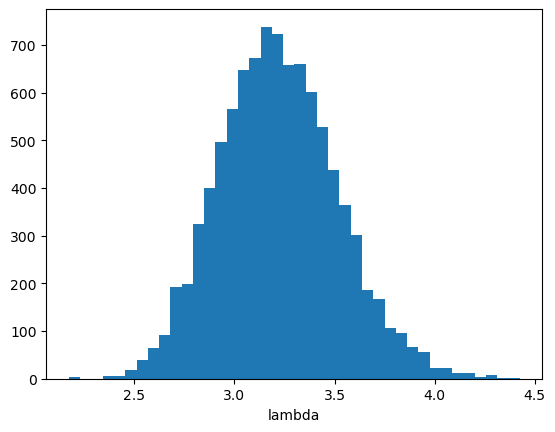

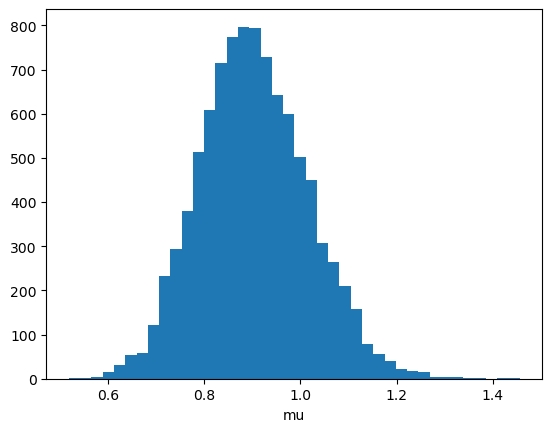

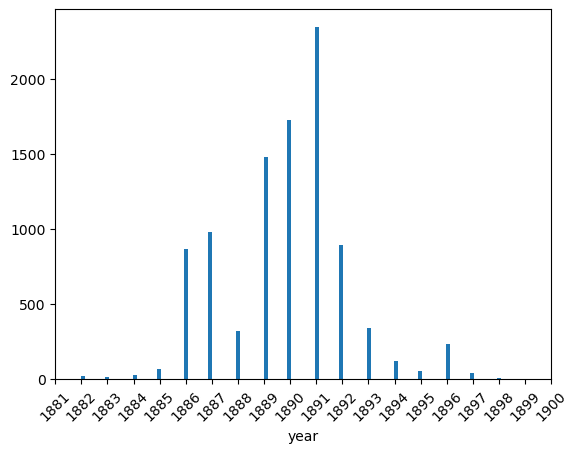

In [2]:
rng = np.random.default_rng(1)

# x is the number of coal mine disasters per year
# fmt: off
x = [4, 5, 4, 1, 0, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1,
     4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3,
     0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
     0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
     0, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
# fmt: on

year = [y for y in range(1851, 1963)]

n = len(x)
obs = 10000
burn = 500

lambdas = np.zeros(obs)
mus = np.zeros(obs)
ms = np.zeros(obs)
posterior_m = np.zeros(n)

# inits
lambdas[0] = 4
mus[0] = 0.5
ms[0] = 10

# hyperparameters
alpha = 4
beta = 1
gamma = 0.5
delta = 1

# sampling
for i in tqdm(range(1, obs)):
    # lambda
    mm = int(ms[i - 1])
    alpha1 = alpha + np.sum(x[: mm + 1])
    beta1 = mm + beta

    lambdas[i] = rng.gamma(alpha1, 1 / beta1)

    # mu
    gamma1 = gamma + np.sum(x) - np.sum(x[: mm + 1])
    delta1 = n - mm + delta

    mus[i] = rng.gamma(gamma1, 1 / delta1)

    # posterior weights
    for j in range(n):
        posterior_m[j] = np.exp((mus[i] - lambdas[i]) * j) * (
            lambdas[i] / mus[i]
        ) ** np.sum(x[: j + 1])
        # normalize to get probabilities
        weights = posterior_m / np.sum(posterior_m)

    ms[i] = rng.choice(range(n), replace=False, p=weights, shuffle=False)

lambdas = lambdas[burn:]
mus = mus[burn:]
ms = ms[burn:]

plt.hist(lambdas, 40)
plt.xlabel("lambda")
plt.show()

plt.hist(mus, 40)
plt.xlabel("mu")
plt.show()

plt.hist(ms + 1851, n)
plt.xlabel("year")
plt.xticks(year[30:50], rotation=45)
plt.minorticks_off()
plt.show()

In [3]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Sat Mar 18 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.9.0

matplotlib: 3.6.3
numpy     : 1.24.2

